<a href="https://colab.research.google.com/github/dongchimi12/KKJ/blob/main/%EC%9D%B8%EA%B5%AC%EC%A0%84%EC%B2%98%EB%A6%AC%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [23]:
from google.colab import drive
drive.mount('/content/drive')   ## 링크 클릭해서 구글 로그인 한후에 드라이브에 데이터 넣고 [3]에 파일 이름만 바꿔주면 됨

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
test = pd.read_csv('/content/drive/My Drive/contest/test.csv', encoding='cp949') ## 파일 test에 저장

In [25]:
test.head(5) ## 위에서 5행까지 출력 test용

,동 이름,센터 이름,center_p,city_p
0,오륜동,KSPO송파,243,18341
1,풍기동=온양6동,KSPO아산,26,29224
2,내곡동,강릉,44,16534
3,신도안면,계룡,16,8759
4,곡성읍,곡성,140,7990


In [26]:
test.info()
test.columns ## 행수 count , datatype
test.isnull().sum() ## 빈칸 찾기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   동 이름      48 non-null     object
 1   센터 이름     48 non-null     object
 2   center_p  48 non-null     int64 
 3   city_p    48 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


동 이름        0
센터 이름       0
center_p    0
city_p      0
dtype: int64

In [27]:
df = pd.DataFrame(test) ## pandas 이용 dataframe 생성

corr = df.corr(method = 'pearson') ## 상관계수 분석 (전체)
corr

,center_p,city_p
center_p,1.000000,-0.034821
city_p,-0.034821,1.000000


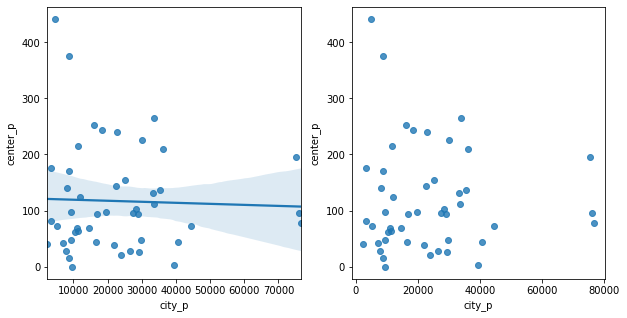

In [35]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='city_p', y='center_p', data=test, ax=ax1)          # 회귀선 표시
sns.regplot(x='city_p', y='center_p', data=test, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()

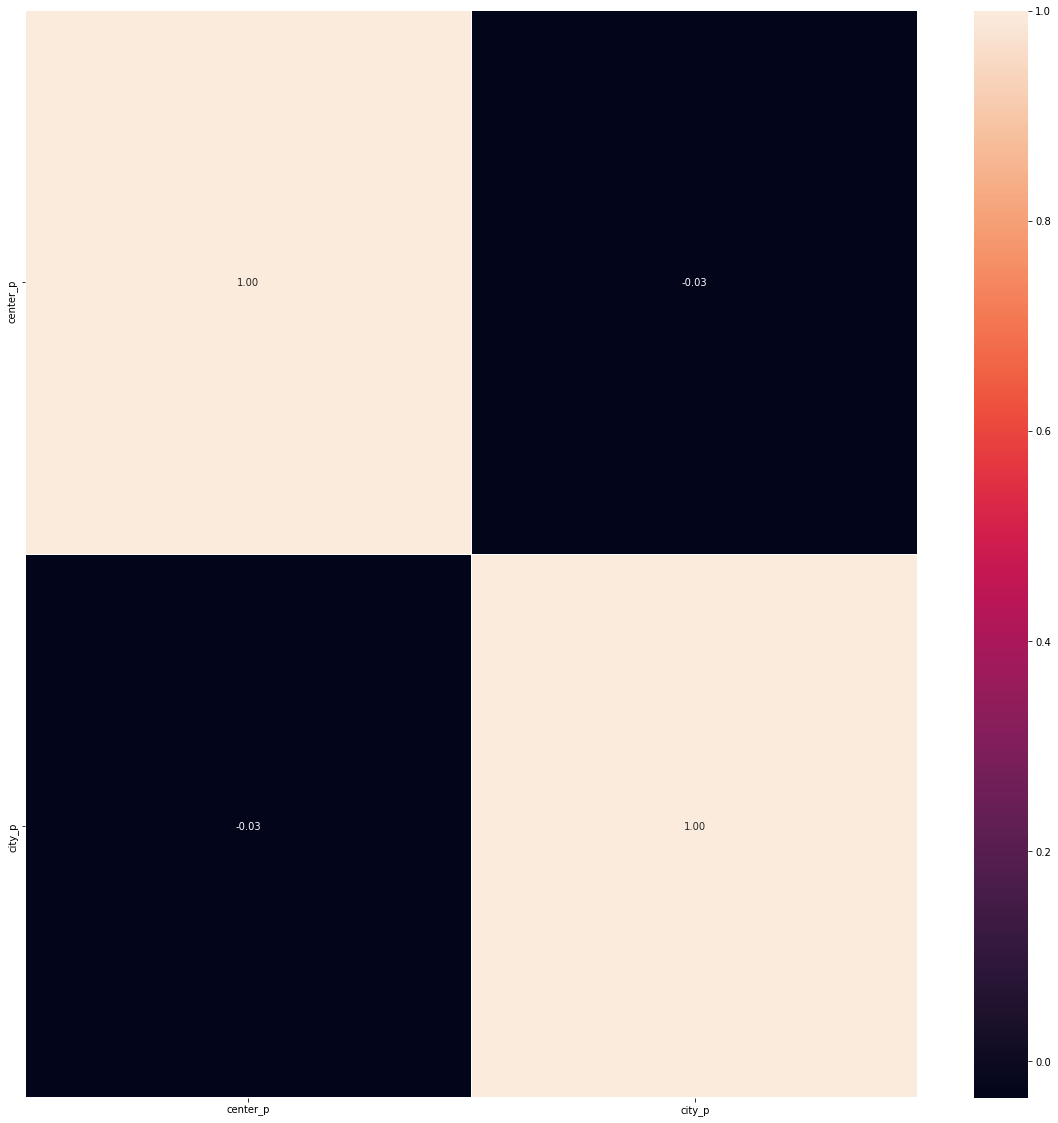

In [33]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

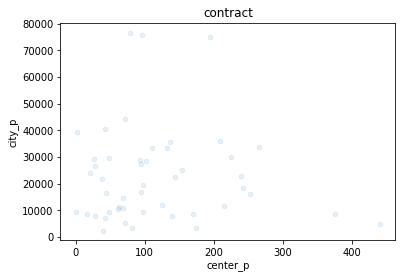

In [30]:
test.plot(kind="scatter", x="center_p", y="city_p", alpha=0.1, title="contract") ## 산점도 밀집도 분석

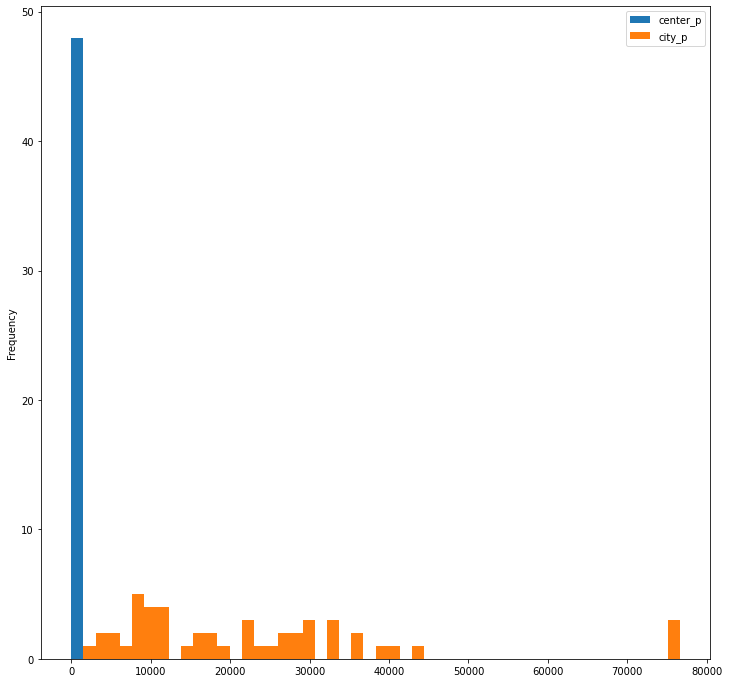

In [36]:
test.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

==================================================================상관분석

In [37]:
sns.pairplot(test ## 시간오래걸림 하려면 )추가 , 변수를 여러가지 방법으로 시각화하는것

SyntaxError: ignored

In [39]:
y = test.center_p
fn = ['city_p']
x = test[fn]   # x 와 y 변수 설정

In [40]:
from sklearn.tree import DecisionTreeRegressor
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(x,y) #랜덤값으로 의사결정트리생성

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [41]:
predictions = iowa_model.predict(x)
print(predictions)

[243.  26.  44.  16. 140.  72.  28.  82.  63.  48. 170. 111.  42. 209.
 175.  78.   2.  72. 144.  68.  93.  28.  95.  68. 154. 215. 132. 225.
  48. 441.  40.  20.  61.  94.  38. 265.  98. 240.  97. 252. 137. 102.
  43. 376. 125.   0.  96. 195.]
